<a href="https://colab.research.google.com/github/arielmpereira/Diplomatura-Ciencias-Datos/blob/main/TP2_para_entregar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

##**Edición 2024**

---

# Trabajo práctico entregable - Parte 2

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
import seaborn as sns

#seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [ ]:
url ='https://raw.githubusercontent.com/DiploDatos/AnalisisyVisualizacion/master/sysarmy_survey_2023_processed.csv'
df = pd.read_csv(url)

In [ ]:
df[:3]

,work_country,work_province,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_last_dollar_value,salary_has_bonus,salary_bonus_tied_to,...,profile_studies_level_state,profile_career,Institución educativa,¿Salir o seguir contestando sobre las guardias?,work_on_call_duty,salary_on_call_duty_charge,Aclará el número que ingresaste en el campo anterior,¿Salir o seguir contestando sobre estudios?,profile_age,profile_gender
0,Argentina,Catamarca,Full-Time,Staff (planta permanente),680000.0,520000.0,NaN,NaN,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,Varón Cis
1,Argentina,Catamarca,Full-Time,Staff (planta permanente),650000.0,520000.0,NaN,NaN,No,No recibo bono,...,Completo,Licenciatura en Sistemas de Información,Universidad Siglo 21,Terminar encuesta,NaN,NaN,NaN,NaN,45,Varón Cis
2,Argentina,Catamarca,Full-Time,Staff (planta permanente),125000.0,104000.0,NaN,NaN,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,Mujer Cis


El umbral maximo es 1125000.0
El umbral mínimo es -275000.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5805 entries, 0 to 5804
Data columns (total 43 columns):
 #   Column                                                                                Non-Null Count  Dtype  
---  ------                                                                                --------------  -----  
 0   work_country                                                                          5805 non-null   object 
 1   work_province                                                                         5805 non-null   object 
 2   work_dedication                                                                       5805 non-null   object 
 3   work_contract_type                                                                    5805 non-null   object 
 4   salary_monthly_BRUTO                                                                  5805 non-null   float64
 5   salary_monthly_NETO    

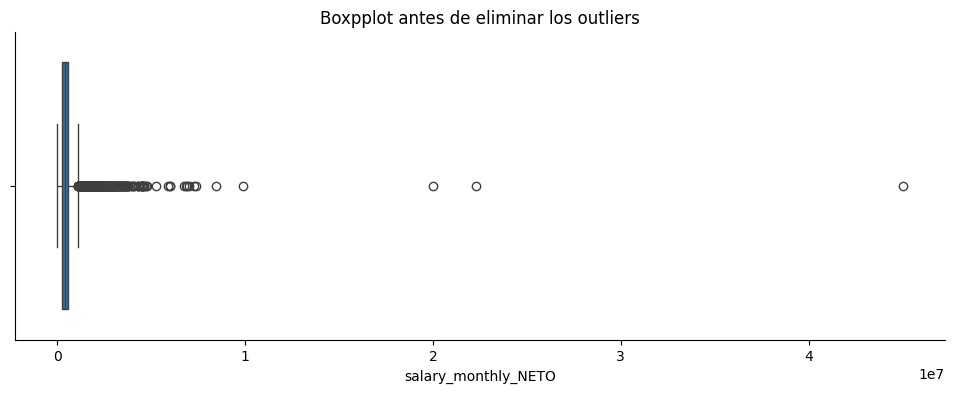

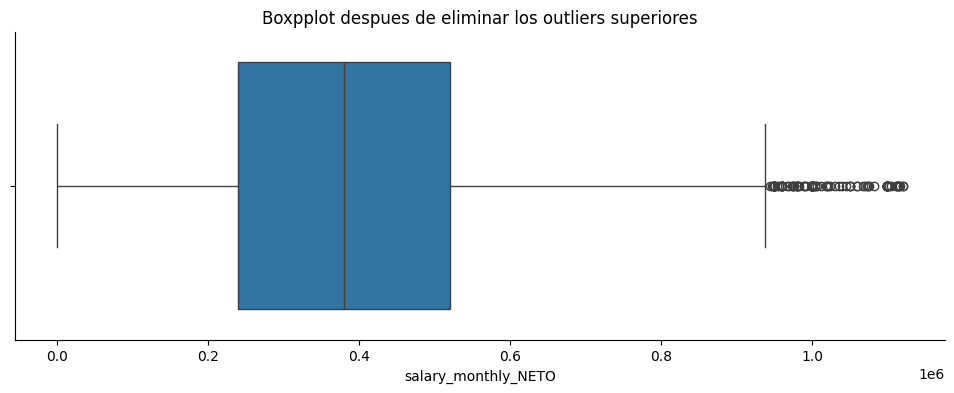

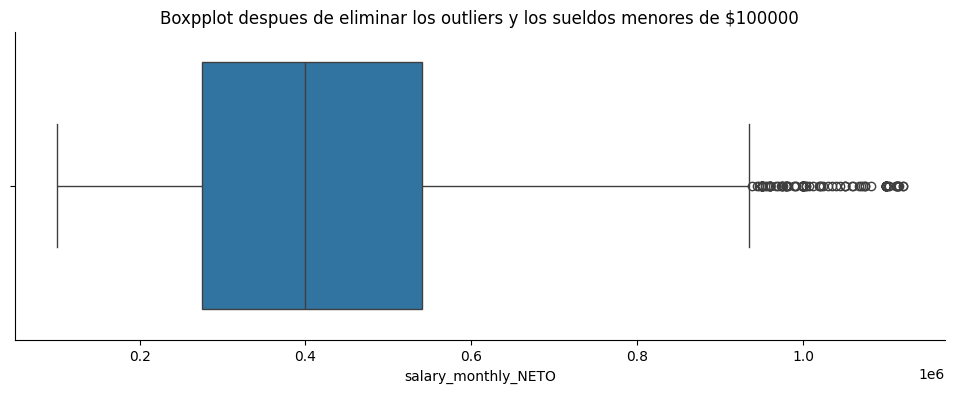

In [ ]:
plt.figure(figsize=(12, 4))
plt.title('Boxpplot antes de eliminar los outliers')
sns.boxplot(x=df['salary_monthly_NETO'])
sns.despine()

#Calculamos el umbral maximo, que luego lo usaremos para definir outliers

q3 = df['salary_monthly_NETO'].quantile(75/100)
q1 = df['salary_monthly_NETO'].quantile(25/100)
iqr = q3 - q1

min= q1-1.5*iqr
max= q3+1.5*iqr
print(f'El umbral maximo es {max}')
print(f'El umbral mínimo es {min}')

plt.figure(figsize=(12, 4))
plt.title('Boxpplot despues de eliminar los outliers superiores')
sns.boxplot(x=df['salary_monthly_NETO'][(df['salary_monthly_NETO'] < max)])
sns.despine()


plt.figure(figsize=(12, 4))
plt.title('Boxpplot despues de eliminar los outliers y los sueldos menores de $100000')
sns.boxplot(x=df['salary_monthly_NETO'][(df['salary_monthly_NETO'] < max) & (df['salary_monthly_NETO'] > 100000)])
sns.despine()

df.info()

In [ ]:
df = df.loc[(df['salary_monthly_NETO'] < max) & (df['salary_monthly_NETO'] > 100000)]

In [ ]:
df.profile_gender.unique()

array(['Varón Cis', 'Mujer Cis', 'Hombre', 'Prefiero no decir', 'Agénero',
       'Masculino', 'Dolarsexual', '.', 'Queer', 'No binarie',
       'BIEN MACHO Y PORONGUDO. QUE CLASE DE OPCIONES DE MIERDA SON ESTAS?',
       'no entiendo por que la hacen tan dificil. que es eso de cis? soy heterosexual.',
       'Hombre..... tipo normal', 'Cis', 'Mujer Trans',
       'varon, no se que es varon cis', 'Normal', 'que pelotudos eh',
       'hombre', 'Helicoptero de ataque apache', 'Varón Trans',
       'Varoo natural', 'Bigénero', 'Mujer', 'Transformer', 'Varon',
       'masculino', 'Hombre, macho silencioso',
       'no compliquemos lo simple', 'Agenero, presentación mujer cis',
       'Porque tantas opciones? Solo hay 2. Soy hombre.', 'heterosexual',
       'Machote', 'Gris', 'Heterosexual', 'Fluido',
       'Hombre    (sexo cromosómico:  XY)',
       'No corresponde, es como preguntar la religion o el color de piel',
       'No entiendo', 'Que? Fluido obvio', 'Lesbiana',
       'Que trolo 

In [ ]:
df.loc[:,'profile_g'] = df.profile_gender.replace({'Varón Cis': 'Varón cis','Mujer': 'Mujer cis','Mujer Cis': 'Mujer cis','Femenino': 'Mujer cis','mujer': 'Mujer cis','Mujer':'Mujer cis','Queer':'Diversidades','Varón Trans':'Diversidades','No binarie':'Diversidades','Mujer Trans':'Diversidades','Fluido':'Diversidades','Bigénero':'Diversidades','Gay':'Diversidades'}).fillna(False)

<ipython-input-7-4b113d55ae11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'profile_g'] = df.profile_gender.replace({'Varón Cis': 'Varón cis','Mujer': 'Mujer cis','Mujer Cis': 'Mujer cis','Femenino': 'Mujer cis','mujer': 'Mujer cis','Mujer':'Mujer cis','Queer':'Diversidades','Varón Trans':'Diversidades','No binarie':'Diversidades','Mujer Trans':'Diversidades','Fluido':'Diversidades','Bigénero':'Diversidades','Gay':'Diversidades'}).fillna(False)


In [ ]:
alpha = 0.05

In [ ]:
is_man = df.profile_g == 'Varón cis'
is_woman = df.profile_g == 'Mujer cis'


In [ ]:

groupA = df[(df.salary_monthly_NETO > 10000) & is_man].salary_monthly_NETO
groupB = df[(df.salary_monthly_NETO > 10000) & is_woman].salary_monthly_NETO

## Ejercicio 1: Estimación

**Consigna:**  Calcular una estimación puntual y un intervalo de confianza de nivel (1-alpha) para la resta entre la media del salario Neto para Hombres menos la media del salario Neto para otros géneros(diferencia de las medias entre el grupoA y grupoB).
¿Cómo se relaciona este intervalo de confianza con el test de hipótesis?


#### 1.1. Análisis descriptivo y de distribucion de Grupos A y B
Se presentan los estadisticos descriptivos de cada grupo, junto a histogramas Y Box-Plot.








In [ ]:
from scipy import stats as st
grupos = [groupA, groupB]
col_nombres = ['A', 'B']
nombres_estadisticos = ['Media', 'Mediana', 'Moda', 'Deviación estándar', '25%', '500%', '75%']
estadisticos_calculo = [(
    np.mean(c), np.median(c), st.mode(c)[0], np.std(c),
    np.nanquantile(c, 0.25, axis=0), np.nanquantile(c, 0.5, axis=0), np.nanquantile(c, 0.75, axis=0)
    ) for c in grupos]

it_dispersion = zip(col_nombres, estadisticos_calculo)
lista_dispersion = list(it_dispersion)
dict_dispersion = {key: value for key, value in lista_dispersion}
estadisticos = pd.DataFrame(dict_dispersion, index=nombres_estadisticos)



estadisticos

,A,B
Media,446064.597727,389619.499363
Mediana,415000.000000,352000.000000
Moda,500000.000000,400000.000000
Deviación estándar,209068.598043,204350.719652
25%,292000.000000,240000.000000
500%,415000.000000,352000.000000
75%,555000.000000,465010.000000


Text(0.5, 1.0, 'Histograma de frecuencias grupos A y B')

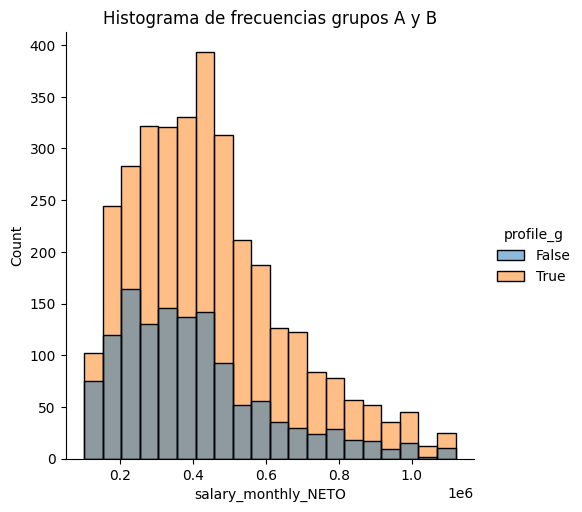

In [ ]:
sns.displot(x = df['salary_monthly_NETO'], binwidth= 50000 , hue=is_man)
plt.title('Histograma de frecuencias grupos A y B')

In [ ]:
df['work_country']

0       Argentina
1       Argentina
2       Argentina
3       Argentina
4       Argentina
          ...    
5799    Argentina
5800    Argentina
5801    Argentina
5803    Argentina
5804    Argentina
Name: work_country, Length: 4645, dtype: object

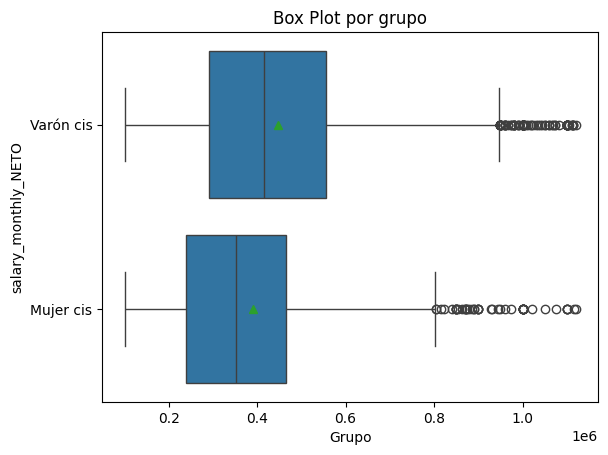

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Combinamos los DataFrames
mujeres_hombres = df[is_man | is_woman]

# Crea el gráfico de boxplot
sns.boxplot(
    data = mujeres_hombres,
    x = mujeres_hombres.salary_monthly_NETO ,
    y = mujeres_hombres.profile_g,
    showmeans=True

)

# Ajusta título y etiquetas de eje
plt.title("Box Plot por grupo")
plt.xlabel("Grupo")
plt.ylabel("salary_monthly_NETO")

# Muestra el gráfico
plt.show()


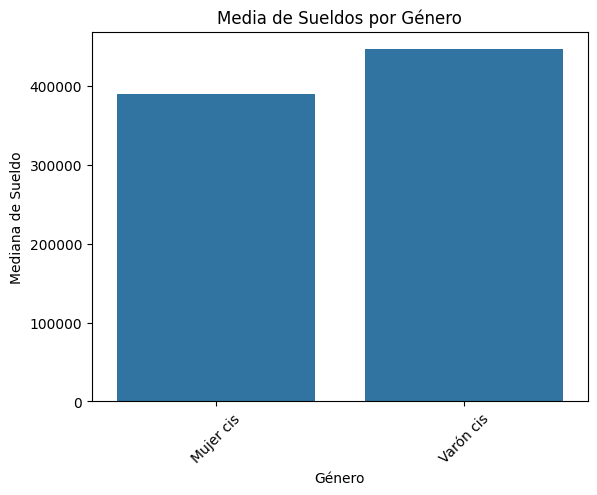

profile_g
Mujer cis    389619.499363
Varón cis    446064.597727
Name: salary_monthly_NETO, dtype: float64

In [ ]:
# Ajusta título y etiquetas de eje
plt.title("Box Plot por grupo")
plt.xlabel("Grupo")
plt.ylabel("salary_monthly_NETO")

# Calcula las medias por género
mean_salaries = mujeres_hombres.groupby('profile_g')['salary_monthly_NETO'].mean()

# Crea el gráfico de barras para las medias
sns.barplot(x=mean_salaries.index, y=mean_salaries.values)

# Personaliza el gráfico de barras (opcional)
plt.title("Media de Sueldos por Género")
plt.xlabel("Género")
plt.ylabel("Mediana de Sueldo")
plt.xticks(rotation=45)

# Muestra los gráficos
plt.show()

mean_salaries.head()



QQPlot y Prueba de Normalidad para evaluar los grupos A y B.   
Verificar igualdad de varianzas entre Grupos



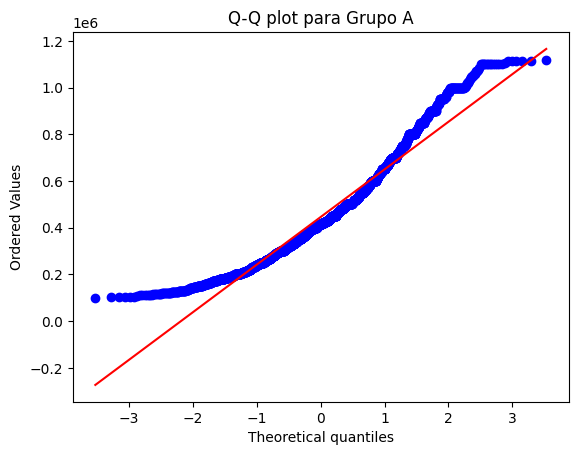

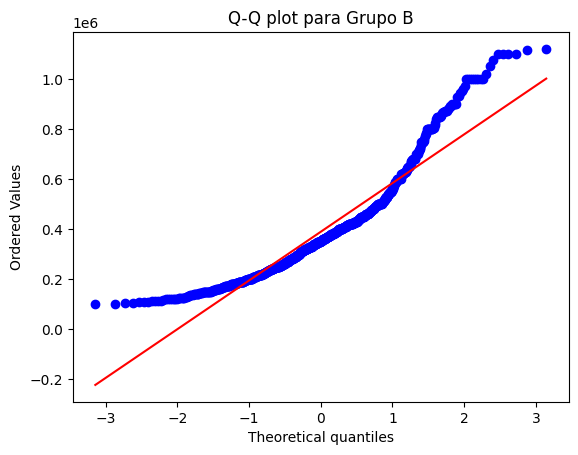

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Genera el Q-Q plot para 'Grupo A'
stats.probplot(groupA, dist="norm", plot=plt)
plt.title("Q-Q plot para Grupo A")
plt.show()

# Genera el Q-Q plot para 'Grupo B'
stats.probplot(groupB, dist="norm", plot=plt)
plt.title("Q-Q plot para Grupo B")
plt.show()

In [ ]:
!pip install pingouin
import pingouin as pg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 2.2 MB/s eta 0:00:00


<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

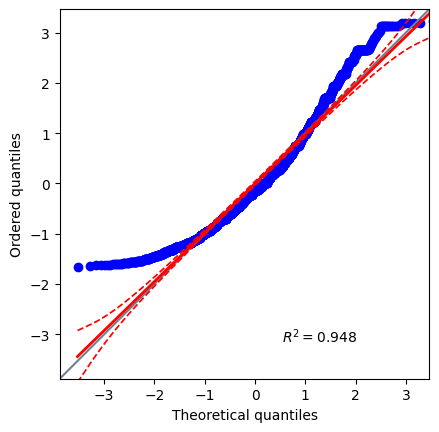

In [ ]:
pg.qqplot(groupA, dist='norm', confidence=.95)

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

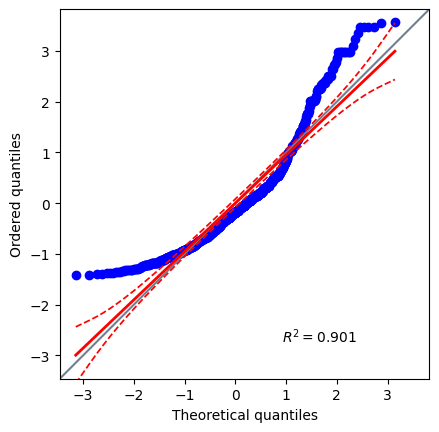

In [ ]:
pg.qqplot(groupB, dist='norm', confidence=.95)

In [ ]:
import numpy as np
from scipy import stats

# El test de Kolmogorov-Smirnov se utiliza para probar normalidad para muestras con n>50
kolmogorov_stat, p_valor = stats.ks_2samp(groupA, groupB)

# Imprimir los resultados
print("Estadístico de Kolmogorov-Smirnov:", kolmogorov_stat)
print("Valor p:", p_valor)


Estadístico de Kolmogorov-Smirnov: 0.15030296229802514
Valor p: 1.3385642448830393e-13


La distribucion de los grupos no es Normal, sin embargo por la TCL, si X no es normal y n ≥ 30, el estadístico de contraste también seguirá, de forma aproximada, una Tn−1. Además, si X no difiere apenas de la normal, también podrá ser aproximada por una Tn−1.

In [ ]:
from scipy.stats import levene

# Suponiendo las dos muestras en arrays
stat, p = levene(groupA, groupB)
print ("Valor p:", p_valor)
if p > 0.05:
    print("Las varianzas son iguales")
else:
    print("Las varianzas son diferentes")

Valor p: 1.3385642448830393e-13
Las varianzas son diferentes


#### 1.2. Estimacion puntual y de intervalo de confianza IC
Suponiendo que los grupos son independientes, se calcula el IC al 95% para la diferencia de medias, teniendo en cuenta la falta de homgeneidad de varianzas.




In [ ]:
from scipy.stats import ttest_ind

# Suponiendo que 'grupoA' y 'grupoB' son las dos muestras
stat, p = ttest_ind(groupA, groupB, equal_var=False)  # Asume distintas varianzas
mean_diff = np.mean(groupA) - np.mean(groupB)
std_err = np.sqrt(np.var(groupA) / len(groupA) + np.var(groupB) / len(groupB))
conf_int = (mean_diff - 1.96 * std_err, mean_diff + 1.96 * std_err)  # Intervalo de confianza al 95%

print ("Diferencia de medias entre grupos A y B:",mean_diff)
print("Intervalo de confianza para la diferencia de medias de los Grupos A y B:", conf_int)

Diferencia de medias entre grupos A y B: 56445.098364098754
Intervalo de confianza para la diferencia de medias de los Grupos A y B: (40854.747229553104, 72035.4494986444)


* RTA: el IC de la diferencia de medias de los grupos A y B "NO contiene al cero", indicando que las medias poblacionales son diferentes, el salario es significativamente mayor en el grupo A.

El valor de la estimación puntual de la diferencia de medias es de $56445. Esto significa que, en promedio, los hombres ganan 56445 pesos más que las mujeres. Esta diferencia equivale a un 13.28%

Con un nivel de confianza del 95%, podemos estar seguros de que la verdadera diferencia de medias se encuentra dentro del rango:

Limite inferior: 40854.74

Limite superior: 72035.44

#### 1.3. Relacion entre IC y Test de Hipotesis

El intervalo de confianza y la prueba de hipótesis son dos herramientas fundamentales en estadística inferencial que se utilizan para analizar datos y sacar conclusiones sobre una población a partir de una muestra. Si bien ambas persiguen el mismo objetivo de inferir sobre la población, lo hacen de diferentes maneras y se complementan entre sí.

**Intervalo de confianza**

**Definición**: Es un rango de valores que contiene, con un nivel de confianza preestablecido (por ejemplo, 95%), el valor real del parámetro poblacional que se está estimando.

**Interpretación**: Si el valor real del parámetro poblacional se encuentra dentro del intervalo de confianza, no se puede rechazar la hipótesis nula de que el parámetro tiene un valor específico (por ejemplo, una media poblacional igual a 0).

**Ventajas**:
Proporciona una estimación puntual del parámetro poblacional junto con un margen de error.
No requiere la definición de una hipótesis nula y una alternativa.
Se puede utilizar para estimar una amplia gama de parámetros poblacionales.
Desventajas:
No proporciona una respuesta concluyente sobre si la hipótesis nula es verdadera o falsa.
El tamaño del intervalo de confianza depende del nivel de confianza elegido y del tamaño de la muestra.

**Prueba de hipótesis**

**Definición**: Es un procedimiento estadístico que permite decidir si se rechaza o no la hipótesis nula (H0) a favor de la hipótesis alternativa (H1), en base a la evidencia proporcionada por una muestra.

**Interpretación**:
Si el valor p (probabilidad de obtener un resultado tan extremo o más extremo que el observado, suponiendo que la hipótesis nula sea verdadera) es menor que el nivel de significancia (por ejemplo, 0.05), se rechaza la hipótesis nula y se concluye que hay evidencia suficiente para apoyar la hipótesis alternativa.
Si el valor p es mayor que el nivel de significancia, no se rechaza la hipótesis nula y no se puede concluir que haya evidencia suficiente para apoyar la hipótesis alternativa.

**Ventajas**:
Proporciona una respuesta concluyente sobre si la hipótesis nula es verdadera o falsa.
Permite establecer un nivel de significancia para controlar la probabilidad de cometer un error tipo I (rechazar la hipótesis nula cuando es verdadera).

**Desventajas**:
Requiere la definición de una hipótesis nula y una alternativa específicas.
El valor p depende del tamaño de la muestra, del efecto del tamaño y del nivel de significancia elegido.
Relación entre intervalo de confianza y prueba de hipótesis:

**Equivalencia entre IC y PdH**

Un intervalo de confianza al 95% de nivel de confianza es equivalente a una prueba de hipótesis bilateral con un nivel de significancia del 5%.
La información proporcionada por el intervalo de confianza y la prueba de hipótesis se puede utilizar de manera complementaria para obtener una comprensión más completa de los datos.
La elección entre utilizar un intervalo de confianza o una prueba de hipótesis depende del objetivo específico del análisis y de la información que se busca obtener.




* *RTA*: Conociendo que, de acuerdo al resultado del Intervalo para la diferencia de medias con 95% de confianza entre los grupos A y B, se asume que las medias son distintas, y se espera que en la Prueba de Hipotesis con $\alpha$ = 0,05 se verifique lo mismo, esto es rechazar $H_0: \mu_A = \mu_B$

## Ejercicio 2: Test de hipótesis



### 2.1 Formalización

Consigna: Describir formalmente los distintos componentes de un test de hipótesis para comprobar si la distribución de los salarios es distinta entre los grupos A y B.


> 1.   Plantear las hipotesis de interes


**Hipótesis Nula**

$H_0: \mu_A = \mu_B$ ó $\mu_A - \mu_B = 0$ Las medias de salarios de los grupos A y B son iguales

**Hipótesis Alternativa**

$H_1: \mu_A ≠ \mu_B$ ó $\mu_A - \mu_B ≠ 0$ Las medias de salarios de grupos A y B son diferentes

> 2. Establecer nivel de significancia *

$\alpha=0.05$



> 3. Identificar el estadístico de prueba
**Estadístico (Pivote)**

Bajo la suposicion de que los grupos son independientes y habiendo probado que las varianzas son distintas, se define:

**El estadístico** adecuado para comparar las medias de dos distribuciones asimétricas es la diferencia de medias corregida por Welch. Se calcula como la diferencia entre la media del grupo A (μA) y la media del grupo B (μB), utilizando la siguiente fórmula:

$t_welch = (μ_A - μ_B) / √(s²_A/n_A + s²_B/n_B)$


Para comparar medias poblacionales (μA y μB) de los salarios de los grupos A y B es la prueba t de Student.

$t = (X̄_A - X̄_B) / √(s²_A / n_A + s²_B / n_B)$

Donde:

sA² y sB² son las varianzas muestrales de los salarios en los grupos A y B, respectivamente.

$n_A$ y $n_B$ son los tamaños muestrales de los grupos A y B, respectivamente.

> 4. Calcular p valor y concluir sobre las hipotesis



  **Distribución del Estadístico bajo H0:**

Bajo la hipótesis nula (H0) de que las distribuciones de salarios son iguales, el estadístico t_welch sigue una distribución t de Student con grados de libertad ajustados.   
Los grados de libertad ajustados $gl_a$ se calculan como:

$gl_a = (s²_A/n_A + s²_B/n_B)² \; / \: ((s²_A/n_A)²/(n_A-1)+((s²_B/n_B)²/(n_B-1))$





### 2.2 P-valor

1. Calcule el p-valor y decida si rechazar o no la hipótesis nula.
2. Interprete el resultado.

Links útiles:
* [Test de hipótesis usando scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
* [Test de Welch](http://daniellakens.blogspot.com/2015/01/always-use-welchs-t-test-instead-of.html)

In [ ]:
import scipy.stats as stats

# Realiza el test de Welch para la diferencia de medias
t_stat = stats.ttest_ind(groupA, groupB, equal_var=False)
p_valor= stats.ttest_ind(groupA, groupB, equal_var=False)
df = stats.ttest_ind(groupA, groupB, equal_var=False)


# Imprime el resultado del test
print("Welch's Test T, p-valor, grados de libertad:", t_stat)

# Tambien se puede utilizar: t_statistic, p_value = stats.ttest_ind(groupA, groupB, equal_var=False)


Welch's Test T, p-valor, grados de libertad: TtestResult(statistic=7.0926053209007724, pvalue=2.1568247912892106e-12, df=1298.1340383178288)


Interpretación: Si p_valor < nivel_significancia (por ejemplo, 0.05): se rechaza la hipótesis nula de medias iguales y se concluye que hay una diferencia significativa entre las medias de los dos grupos. Si p_valor >= nivel_significancia: no se rechaza la hipótesis nula y no se puede concluir que haya una diferencia significativa entre las medias de los dos grupos.

RTA: el p-valor de 2.1568247912892106e-12 indica que se rechaza 𝐻0, por lo tanto los salarios entre los grupos A y B son significativamente diferentes.

### **Método de Welch para verificar diferencia de medias**

En el análisis de las diferencias salariales entre hombres y mujeres, se observó que las distribuciones de ingresos para ambos grupos presentaban asimetría. Esta asimetría, caracterizada por una distribución no normal de los datos, implica que el uso del estimador Z tradicional, basado en la distribución normal estándar, podría no ser adecuado para inferir sobre la diferencia de medias entre los grupos.

Para abordar este problema y realizar una inferencia estadística más robusta y confiable, se optó por emplear el método de Welch en lugar del estimador Z. El método de Welch, también conocido como prueba t de Student para muestras independientes con varianzas desiguales, es una alternativa más adecuada cuando se sospecha que las distribuciones de las muestras pueden no ser normales o tener varianzas diferentes.

**Razones para utilizar el método de Welch:**

* Asimetría en las distribuciones: La presencia de asimetría en las distribuciones de salarios de hombres y mujeres viola el supuesto de normalidad que subyace al estimador Z. El método de Welch, por otro lado, no asume normalidad y es más robusto ante este tipo de desviaciones de la normalidad.

* Posibles diferencias en las varianzas: La asimetría observada en las distribuciones podría sugerir que las varianzas de los salarios para hombres y mujeres también difieren. El método de Welch tiene en cuenta esta posibilidad al ajustar los grados de libertad en la prueba t de Student, permitiendo varianzas desiguales entre las muestras.

* Mayor confiabilidad de los resultados: Al utilizar un método estadístico adecuado a las características de los datos (asimetría y posibles diferencias en las varianzas), se obtiene una inferencia más confiable sobre la diferencia de medias entre los grupos de hombres y mujeres.


Podemos ver que t=7,05 y el p-value=2.04e-12 aproximadamente.

Como el valor de p es menor que el nivel de significancia (0,05), se rechaza la hipótesis nula (H0) de que las medias poblacionales de los grupos Ay B son iguales.

Es decir, existe evidencia estadística significativa para concluir que los grupos A y B perciben salarios distintos.


### [Opcional] 2.3 Potencia del test

Nuestra muestra, ¿era lo suficientemente grande para detectar si existe o no una diferencia entre los grupos?

1. Utilice la función `tt_ind_solve_power` para calcular el tamaño necesario de la muestra para un poder estadístico de 0.8, 0.9 y 0.95, asumiendo una significancia estadística de 0.05.
2. ¿Cómo intepretan el poder estadístico de un test? Dado su conocimiento de dominio sobre los datos, ¿les parece que esta muestra es lo suficientemente grande para ser representativo de la tendencia general? ¿y para utilizarlo en un juicio penal contra una empresa XX por una causa de discriminación?

[Documentación](https://www.statsmodels.org/stable/generated/statsmodels.stats.power.tt_ind_solve_power.html)

NOTA: este análisis debería hacerse ANTES de recolectar los datos.

In [ ]:
from statsmodels.stats.power import tt_ind_solve_power

In [ ]:
effect_size = (groupA.mean() - groupB.mean()) / groupB.std()
# nobs1=None  - What we want to know
alpha = 0.05
ratio = len(groupB) / len(groupA)
power= 0.8

In [ ]:
tt_ind_solve_power(effect_size=effect_size, alpha=alpha,power=power,  ratio=ratio)

518.2655032131468

El poder estadístico de un test es la probabilidad de detectar una diferencia real entre las poblaciones cuando esta diferencia realmente existe. Un poder alto (por ejemplo, 0.8 o más) indica que el test tiene una alta probabilidad de detectar una diferencia real.

En este caso, los tamaños muestrales actuales son suficientes para alcanzar un poder estadístico alto y poder detectar una diferencia real con una significancia estadística de 0.05.



## Ejercicio 3: Comunicación y visualización

**Consigna:** Seleccionen un resultado que les parezca relevante a partir de alguno de los ejercicios del entregable. Diseñe e implemente una comunicación en base a este mensaje, en un archivo PDF.

Elija las palabras y visualización más adecuada para que la comunicación sea entendible, efectiva y se dapte a UNA de las siguientes situaciones:

1. Una sección en un artículo de difusión a presentar como parte de una organización sin fines de lucro.
No más de 1 página A4 (o dos si los gráficos son muy grandes).
  1. Ejemplo: Alguna de las secciones [Los ecosistemas de emprendimiento de América Latina y el Caribe frente al COVID-19: Impactos, necesidades y recomendaciones](https://publications.iadb.org/es/los-ecosistemas-de-emprendimiento-de-america-latina-y-el-caribe-frente-al-covid-19-impactos-necesidades-y-recomendaciones), por ejemplo la sección *2.2. Reacciones de los emprendedores*.
  2. Ejemplo: Alguna de las secciones de [The state of gender pay gap in 2021](https://www.payscale.com/data/gender-pay-gap?tk=carousel-ps-rc-job)
  3. Puntos clave:
    1. Simpleza de los gráficos.
    2. Comunicación en lenguaje simple a personas que no son necesariamente expertos de dominio.
    2. Selección de UNA oración sobre la que se hace énfasis.
    3. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

2. Una publicación científica o reporte técnico interno. No más de una página A4:
  2. Ejemplo: La sección de resultados de [IZA DP No. 12914: The Impact of a Minimum Wage Change on the Distribution of Wages and Household Income](https://www.iza.org/publications/dp/12914/the-impact-of-a-minimum-wage-change-on-the-distribution-of-wages-and-household-income).
  2. Ejemplo: Alguna de las secciones de [Temporary reduction in daily global CO2 emissions during the COVID-19 forced confinement](https://www.nature.com/articles/s41558-020-0797-x)
  3. Puntos clave:
    3. Nivel de detalle técnico requerido. Es necesario justificar la validez del análisis.
    4. La idea presentada puede ser más compleja. Pueden asumir que la audiencia tiene conocimiento técnico y va a analizar las visualizaciones en detalle.
    5. Pueden presentar más en detalle las limitaciones del análisis (significancia estadística, etc.)
    2. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

3. Un tweet (o post de LinkedIn) para la cuenta de su empresa consultora que hace análisis de datos. El objetivo es promocionar un análisis de datos abiertos que van a incluir en su portfolio:
  1. Ejemplo: [Comparación vacunas covid](https://twitter.com/infobeautiful/status/1381577746527236098?s=20)
  2. Ejemplo: [Tweet del BID](https://twitter.com/el_BID/status/1388508583944507396?s=20). Lo valioso de este tweet es que usaron un único número para transmitir un mensaje. Puede ser algo así, o con un gráfico muy simple.
  3. Ejemplo: [Cambio climático](https://twitter.com/UNFCCC/status/1387732156190011394?s=20) Es un muy buen ejemplo, excepto que el gráfico no se lee nada y hay que entrar a la publicación original.
  3. Ejemplo: [¿Cuánto están los programadores en las empresas?](https://www.linkedin.com/posts/denis-rothman-0b034043_tech-career-work-activity-6793861923269054464-gS6y) (No verificamos la veracidad o seriedad de la fuente).
  4. Puntos clave:
    1. Su audiencia no va a mirar la visualización por más de unos segundos, y no tiene conocimiento técnico.
  3. Tienen que incluir además una *breve* descripción de cómo obtuvieron los datos que están presentando, que no entraría en el tweet.


# **Algunas ideas para el Ejercicio 3**


## **Brecha Salarial en Programación: ¿Un Virus que Infecta la Industria?**

La brecha salarial de género sigue siendo un problema persistente en el área de programación, donde las mujeres ganan en promedio un 18% menos que los hombres por trabajos similares. Este estudio, realizado por nuestra organización, analiza los datos salariales de programadores en Argentina y revela una realidad preocupante: la igualdad de género en el mundo laboral aún está lejos de alcanzarse.

Las causas de esta brecha salarial son complejas y multifactoriales, incluyendo la discriminación por género, las diferencias en las oportunidades de ascenso y las brechas en las habilidades negociadoras. Sin embargo, es evidente que se necesita un esfuerzo conjunto para abordar este problema y construir un sector de programación más justo e igualitario.